# Sonifying LSD profiles

In [16]:
import astronify as snd
import specpolFlow as pol
from astropy.table import Table
import numpy as np

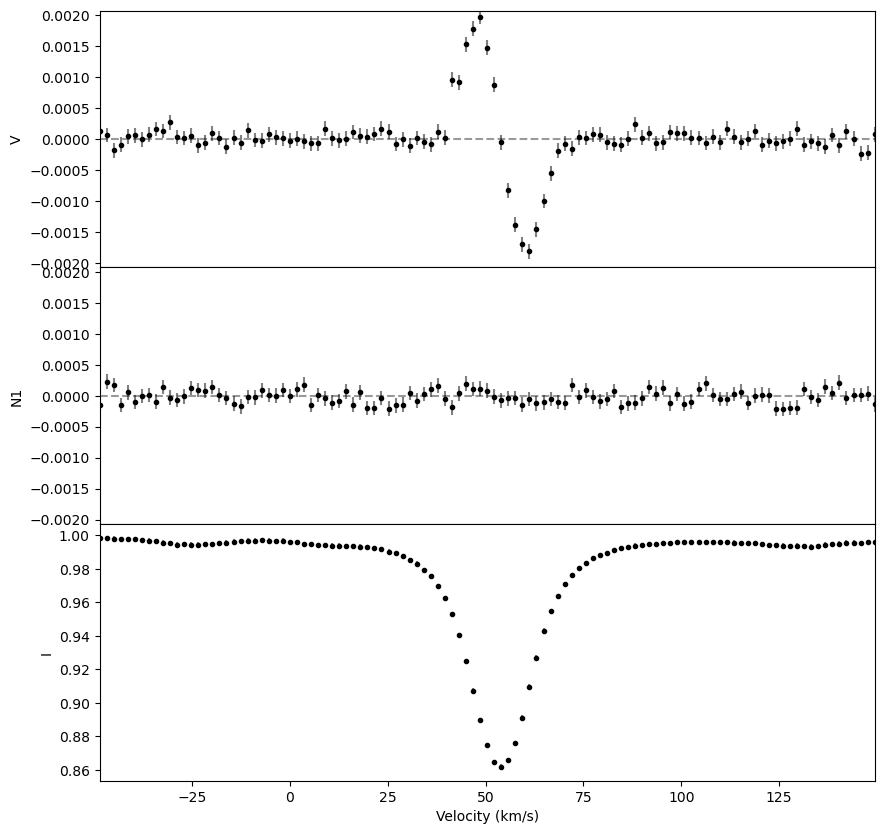

In [17]:
lsd = pol.iolsd.read_lsd('SampleData/SampleLSD.s')
lsd = lsd[np.logical_and(lsd.vel>-50,lsd.vel<150)]
fig, ax = lsd.plot()

In [30]:
data_table = Table({"vel":lsd.vel, "Stokes":lsd.specN1})

data_soni = snd.series.SoniSeries(data_table, time_col='vel', val_col='Stokes')
data_soni.note_spacing = 0.02

data_soni.pitch_mapper.pitch_map_args["zero_point"] = np.median(lsd.specN1)
data_soni.pitch_mapper.pitch_map_args['minmax_value'] = [np.min(lsd.specV), np.max(lsd.specV)]
data_soni.pitch_mapper.pitch_map_args['pitch_range'] = [100, 700]
data_soni.pitch_mapper.pitch_map_args['center_pitch'] = 400


print(data_soni.pitch_mapper.pitch_map_args)

'minmax_valuearray'
'zero_point'

data_soni.sonify()
data_soni.play() 
data_soni.write('N1.wav')

{'pitch_range': [100, 700], 'center_pitch': 400, 'zero_point': -2.0356e-05, 'stretch': 'linear', 'minmax_value': [-0.0018094, 0.0019736]}
Pyo warning: Portaudio input device `MacBook Air Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.
Pyo message: Offline Server rendering file N1.wav dur=2.700000
Pyo message: Offline Server rendering finished.
